## Project: Data Exploration of the performance of globally-selected 15/16-year-old students in Mathematics, Reading and Science Literacy, based on the results of the PISA 2012 test

### **by Eshan Kulkarni**

***

## Table of Contents
- [Introduction of the topic and dataset](#intro)
- [Dataset Investigation and preliminary wrangling](#dataset_investigation)
- [Univariate Exploration and Analysis](#univariate)
- [Bivariate Exploration and Analysis](#bivariate)
- [Multivariate Exploration and Analysis](#multivariate)
- [Conclusions and answers](#conclusions)

<a id='intro'></a>
## Introduction of the topic and dataset

### Introduction to PISA *(ref.: NCES 2014-024, U.S. Department of Education)*

#### What Is PISA? 

The Program for International Student Assessment (PISA) is a system of international assessments that allows countries to compare outcomes of learning as students near the end of compulsory schooling. PISA core assessments measure the performance of 15-year-old students in mathematics, science, and reading literacy every 3 years. Coordinated by the Organization for Economic Cooperation and Development (OECD), PISA was first implemented in 2000 in 32 countries. It has since grown to 65 education systems in 2012. 

#### What PISA Measures 

PISA’s goal is to assess students’ preparation for the challenges of life as young adults. PISA assesses the application of knowledge in mathematics, science, and reading literacy to problems within a reallife context (OECD 1999). PISA does not focus explicitly on curricular outcomes and uses the term “literacy” in each subject area to indicate its broad focus on the application of knowledge and skills. For example, when assessing mathematics, PISA examines how well 15-year-old students can understand, use, and reflect on mathematics for a variety of real-life problems and settings that they may not encounter in the classroom. Scores on the PISA scales represent skill levels along a continuum of literacy skills. 

Each PISA data collection cycle assesses one of the three core subject areas in depth (considered the major subject area), although all three core subjects are assessed in each cycle (the other two subjects are considered minor subject areas for that assessment year). Assessing all three subjects every 3 years allows countries to have a consistent source of achievement data in each of the three subjects, while rotating one area as the primary focus over the years. Mathematics was the major subject area in 2012, as it was in 2003, since each subject is a major subject area once every three cycles. In 2012, mathematics, science, and reading literacy were assessed primarily through a paper-and-pencil assessment, and problem solving was administered via a computer-based assessment. In addition to these core assessments, education systems could participate in optional paper-based financial literacy and computer-based mathematics and reading assessments. The United States participated in these optional assessments. Visit www.nces.ed.gov/surveys/pisa for more information on the PISA assessments, including information on how the assessments were designed and examples of PISA questions. 

### Introduction to the PISA 2012 dataset

PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school.

Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science representing about 28 million 15-year-olds globally. Of those economies, 44 took part in an assessment of creative problem solving and 18 in an assessment of financial literacy.

***

<a id='dataset_investigation'></a>
## Dataset Investigation and Preliminary Wrangling

Since the dataset provided has _636_ variables (according to its specified data dictionary), we will begin our exploration by wrangling the data accordingly, in order to better understand which variables might be worth delving into.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_rows', 636)
pd.set_option('display.max_columns', 636)

In [2]:
df = pd.read_csv('pisa2012.csv', encoding='latin-1', low_memory = False)

In [3]:
df.head()

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,ST03Q02,ST04Q01,ST05Q01,ST06Q01,ST07Q01,ST07Q02,ST07Q03,ST08Q01,ST09Q01,ST115Q01,ST11Q01,ST11Q02,ST11Q03,ST11Q04,ST11Q05,ST11Q06,ST13Q01,ST14Q01,ST14Q02,ST14Q03,ST14Q04,ST15Q01,ST17Q01,ST18Q01,ST18Q02,ST18Q03,ST18Q04,ST19Q01,ST20Q01,ST20Q02,ST20Q03,ST21Q01,ST25Q01,ST26Q01,ST26Q02,ST26Q03,ST26Q04,ST26Q05,ST26Q06,ST26Q07,ST26Q08,ST26Q09,ST26Q10,ST26Q11,ST26Q12,ST26Q13,ST26Q14,ST26Q15,ST26Q16,ST26Q17,ST27Q01,ST27Q02,ST27Q03,ST27Q04,ST27Q05,ST28Q01,ST29Q01,ST29Q02,ST29Q03,ST29Q04,ST29Q05,ST29Q06,ST29Q07,ST29Q08,ST35Q01,ST35Q02,ST35Q03,ST35Q04,ST35Q05,ST35Q06,ST37Q01,ST37Q02,ST37Q03,ST37Q04,ST37Q05,ST37Q06,ST37Q07,ST37Q08,ST42Q01,ST42Q02,ST42Q03,ST42Q04,ST42Q05,ST42Q06,ST42Q07,ST42Q08,ST42Q09,ST42Q10,ST43Q01,ST43Q02,ST43Q03,ST43Q04,ST43Q05,ST43Q06,ST44Q01,ST44Q03,ST44Q04,ST44Q05,ST44Q07,ST44Q08,ST46Q01,ST46Q02,ST46Q03,ST46Q04,ST46Q05,ST46Q06,ST46Q07,ST46Q08,ST46Q09,ST48Q01,ST48Q02,ST48Q03,ST48Q04,ST48Q05,ST49Q01,ST49Q02,ST49Q03,ST49Q04,ST49Q05,ST49Q06,ST49Q07,ST49Q09,ST53Q01,ST53Q02,ST53Q03,ST53Q04,ST55Q01,ST55Q02,ST55Q03,ST55Q04,ST57Q01,ST57Q02,ST57Q03,ST57Q04,ST57Q05,ST57Q06,ST61Q01,ST61Q02,ST61Q03,ST61Q04,ST61Q05,ST61Q06,ST61Q07,ST61Q08,ST61Q09,ST62Q01,ST62Q02,ST62Q03,ST62Q04,ST62Q06,ST62Q07,ST62Q08,ST62Q09,ST62Q10,ST62Q11,ST62Q12,ST62Q13,ST62Q15,ST62Q16,ST62Q17,ST62Q19,ST69Q01,ST69Q02,ST69Q03,ST70Q01,ST70Q02,ST70Q03,ST71Q01,ST72Q01,ST73Q01,ST73Q02,ST74Q01,ST74Q02,ST75Q01,ST75Q02,ST76Q01,ST76Q02,ST77Q01,ST77Q02,ST77Q04,ST77Q05,ST77Q06,ST79Q01,ST79Q02,ST79Q03,ST79Q04,ST79Q05,ST79Q06,ST79Q07,ST79Q08,ST79Q10,ST79Q11,ST79Q12,ST79Q15,ST79Q17,ST80Q01,ST80Q04,ST80Q05,ST80Q06,ST80Q07,ST80Q08,ST80Q09,ST80Q10,ST80Q11,ST81Q01,ST81Q02,ST81Q03,ST81Q04,ST81Q05,ST82Q01,ST82Q02,ST82Q03,ST83Q01,ST83Q02,ST83Q03,ST83Q04,ST84Q01,ST84Q02,ST84Q03,ST85Q01,ST85Q02,ST85Q03,ST85Q04,ST86Q01,ST86Q02,ST86Q03,ST86Q04,ST86Q05,ST87Q01,ST87Q02,ST87Q03,ST87Q04,ST87Q05,ST87Q06,ST87Q07,ST87Q08,ST87Q09,ST88Q01,ST88Q02,ST88Q03,ST88Q04,ST89Q02,ST89Q03,ST89Q04,ST89Q05,ST91Q01,ST91Q02,ST91Q03,ST91Q04,ST91Q05,ST91Q06,ST93Q01,ST93Q03,ST93Q04,ST93Q06,ST93Q07,ST94Q05,ST94Q06,ST94Q09,ST94Q10,ST94Q14,ST96Q01,ST96Q02,ST96Q03,ST96Q05,ST101Q01,ST101Q02,ST101Q03,ST101Q05,ST104Q01,ST104Q04,ST104Q05,ST104Q06,IC01Q01,IC01Q02,IC01Q03,IC01Q04,IC01Q05,IC01Q06,IC01Q07,IC01Q08,IC01Q09,IC01Q10,IC01Q11,IC02Q01,IC02Q02,IC02Q03,IC02Q04,IC02Q05,IC02Q06,IC02Q07,IC03Q01,IC04Q01,IC05Q01,IC06Q01,IC07Q01,IC08Q01,IC08Q02,IC08Q03,IC08Q04,IC08Q05,IC08Q06,IC08Q07,IC08Q08,IC08Q09,IC08Q11,IC09Q01,IC09Q02,IC09Q03,IC09Q04,IC09Q05,IC09Q06,IC09Q07,IC10Q01,IC10Q02,IC10Q03,IC10Q04,IC10Q05,IC10Q06,IC10Q07,IC10Q08,IC10Q09,IC11Q01,IC11Q02,IC11Q03,IC11Q04,IC11Q05,IC11Q06,IC11Q07,IC22Q01,IC22Q02,IC22Q04,IC22Q06,IC22Q07,IC22Q08,EC01Q01,EC02Q01,EC03Q01,EC03Q02,EC03Q03,EC03Q04,EC03Q05,EC03Q06,EC03Q07,EC03Q08,EC03Q09,EC03Q10,EC04Q01A,EC04Q01B,EC04Q01C,EC04Q02A,EC04Q02B,EC04Q02C,EC04Q03A,EC04Q03B,EC04Q03C,EC04Q04A,EC04Q04B,EC04Q04C,EC04Q05A,EC04Q05B,EC04Q05C,EC04Q06A,EC04Q06B,EC04Q06C,EC05Q01,EC06Q01,EC07Q01,EC07Q02,EC07Q03,EC07Q04,EC07Q05,EC08Q01,EC08Q02,EC08Q03,EC08Q04,EC09Q03,EC10Q01,EC11Q02,EC11Q03,EC12Q01,ST22Q01,ST23Q01,ST23Q02,ST23Q03,ST23Q04,ST23Q05,ST23Q06,ST23Q07,ST23Q08,ST24Q01,ST24Q02,ST24Q03,CLCUSE1,CLCUSE301,CLCUSE302,DEFFORT,QUESTID,BOOKID,EASY,AGE,GRADE,PROGN,ANXMAT,ATSCHL,ATTLNACT,BELONG,BFMJ2,BMMJ1,CLSMAN,COBN_F,COBN_M,COBN_S,COGACT,CULTDIST,CULTPOS,DISCLIMA,ENTUSE,ESCS,EXAPPLM,EXPUREM,FAILMAT,FAMCON,FAMCONC,FAMSTRUC,FISCED,HEDRES,HERITCUL,HISCED,HISEI,HOMEPOS,HOMSCH,HOSTCUL,ICTATTNEG,ICTATTPOS,ICTHOME,ICTRES,ICTSCH,IMMIG,INFOCAR,INFOJOB1,INFOJOB2,INSTMOT,INTMAT,ISCEDD,ISCEDL,ISCEDO,LANGCOMM,LANGN,LANGRPPD,LMINS,MATBEH,MATHEFF,MATINTFC,MATWKETH,MISCED,MMINS,MTSUP,OCOD1,OCOD2,OPENPS,OUTHOURS,PARED,PERSEV,REPEAT,SCMAT,SMINS,STUDREL,SUBNORM,TCHBEHFA,TCHBEHSO,TCHBEHTD,TEACHSUP,TESTLANG,TIMEINT,USEMATH,USESCH,WEALTH,ANCATSCHL,ANCATTLNACT,ANCBELONG,ANCCLSMAN,ANCCOGACT,ANCINSTMOT,ANCINTMAT,ANCMATWKETH,ANCMTSUP,ANCSCMAT,ANCSTUD

In [4]:
df = df[['CNT', 'ST03Q02', 'ST04Q01', 'AGE', 'PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV1READ', 
'PV2READ', 'PV3READ', 'PV4READ', 'PV5READ', 'PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE', 'COBN_F', 'COBN_M', 'COBN_S']]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 22 columns):
CNT        485490 non-null object
ST03Q02    485490 non-null int64
ST04Q01    485490 non-null object
AGE        485374 non-null float64
PV1MATH    485490 non-null float64
PV2MATH    485490 non-null float64
PV3MATH    485490 non-null float64
PV4MATH    485490 non-null float64
PV5MATH    485490 non-null float64
PV1READ    485490 non-null float64
PV2READ    485490 non-null float64
PV3READ    485490 non-null float64
PV4READ    485490 non-null float64
PV5READ    485490 non-null float64
PV1SCIE    485490 non-null float64
PV2SCIE    485490 non-null float64
PV3SCIE    485490 non-null float64
PV4SCIE    485490 non-null float64
PV5SCIE    485490 non-null float64
COBN_F     481825 non-null object
COBN_M     481843 non-null object
COBN_S     481836 non-null object
dtypes: float64(16), int64(1), object(5)
memory usage: 81.5+ MB


In [6]:
df.head()

,CNT,ST03Q02,ST04Q01,AGE,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,COBN_F,COBN_M,COBN_S
0,Albania,1996,Female,16.17,406.8469,376.4683,344.5319,321.1637,381.9209,249.5762,254.3420,406.8496,175.7053,218.5981,341.7009,408.8400,348.2283,367.8105,392.9877,Albania,Albania,Albania
1,Albania,1996,Female,16.17,486.1427,464.3325,453.4273,472.9008,476.0165,406.2936,349.8975,400.7334,369.7553,396.7618,548.9929,471.5964,471.5964,443.6218,454.8116,Albania,Albania,Albania
2,Albania,1996,Female,15.58,533.2684,481.0796,489.6479,490.4269,533.2684,401.2100,404.3872,387.7067,431.3938,401.2100,499.6643,428.7952,492.2044,512.7191,499.6643,Albania,Albania,Albania
3,Albania,1996,Female,15.67,412.2215,498.6836,415.3373,466.7472,454.2842,547.3630,481.4353,461.5776,425.0393,471.9036,438.6796,481.5740,448.9370,474.1141,426.5573,Albania,Albania,Albania
4,Albania,1996,Female,15.50,381.9209,328.1742,403.7311,418.5309,395.1628,311.7707,141.7883,293.5015,272.8495,260.1405,361.5628,275.7740,372.7527,403.5248,422.1746,Albania,Albania,Albania


<h5> As we can see there some missing values </h5>

In [7]:
# replace missing values in age with mean value of age
df.loc[np.isfinite(df['AGE']) == False, 'AGE'] = df['AGE'].mean()

In [8]:
# replace NaN or invalid field with 'Missing'
df.loc[df['COBN_F'].isna() == True, 'COBN_F'] = 'Missing'
df.loc[df['COBN_M'].isna() == True, 'COBN_M'] = 'Missing'
df.loc[df['COBN_S'].isna() == True, 'COBN_S'] = 'Missing'

df.loc[df['COBN_M'] == 'Invalid', 'COBN_M'] = 'Missing'
df.loc[df['COBN_F'] == 'Invalid', 'COBN_M'] = 'Missing'
df.loc[df['COBN_S'] == 'Invalid', 'COBN_M'] = 'Missing'

In [9]:
# calculate the average score for Math, Reading & Science

df['Math Score'] = (df['PV1MATH'] + df['PV2MATH'] + df['PV3MATH'] + df['PV4MATH'] + df['PV5MATH']) / 5
df['Reading Score'] = (df['PV1READ'] + df['PV2READ'] + df['PV3READ'] + df['PV4READ'] + df['PV5READ']) / 5
df['Science Score'] = (df['PV1SCIE'] + df['PV2SCIE'] + df['PV3SCIE'] + df['PV4SCIE'] + df['PV5SCIE']) / 5

In [10]:
# drop unneccesary columns
df.drop(columns = ['PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV1READ', 'PV2READ', 'PV3READ', 
                   'PV4READ', 'PV5READ', 'PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE'], inplace=True)

In [11]:
# Rename columns
df.rename({'CNT' : 'Country', 'ST03Q02' : 'Birth year', 'ST04Q01' : 'Gender', 'AGE' : 'Age', 'COBN_F' : 'Birth Country Father', 
           'COBN_M' : 'Birth Country Mother', 'COBN_S' : 'Birth Country Child'}, axis = 'columns', inplace = True)

In [12]:
df['Same Culture Background'] = (df['Birth Country Father'] == df['Birth Country Mother'])

In [13]:
df.loc[df['Same Culture Background'] == True, 'Same Culture Background'] = 'Same'
df.loc[df['Same Culture Background'] == False, 'Same Culture Background'] = 'Different'

In [14]:
df.head()

,Country,Birth year,Gender,Age,Birth Country Father,Birth Country Mother,Birth Country Child,Math Score,Reading Score,Science Score,Same Culture Background
0,Albania,1996,Female,16.17,Albania,Albania,Albania,366.18634,261.01424,371.91348,Same
1,Albania,1996,Female,16.17,Albania,Albania,Albania,470.56396,384.68832,478.12382,Same
2,Albania,1996,Female,15.58,Albania,Albania,Albania,505.53824,405.18154,486.60946,Same
3,Albania,1996,Female,15.67,Albania,Albania,Albania,449.45476,477.46376,453.97240,Same
4,Albania,1996,Female,15.50,Albania,Albania,Albania,385.50398,256.01010,367.15778,Same


In [15]:
df.describe()

,Birth year,Age,Math Score,Reading Score,Science Score
count,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000
mean,1996.070061,15.784283,469.651234,472.006964,475.808094
std,0.255250,0.290186,100.786610,98.863310,97.998470
min,1996.000000,15.170000,54.767080,6.445400,25.158540
25%,1996.000000,15.580000,396.019620,405.044200,405.762800
50%,1996.000000,15.750000,465.734520,475.477980,475.512860
75%,1996.000000,16.000000,540.123060,542.831195,546.381920
max,1997.000000,16.330000,903.107960,849.359740,857.832900


As we can see above, the data is clearly very abundant, with a large number of variables to take into consideration.

*After looking throughout the Dataset, we will try to find answers to following questions:*

* **_How do students from difeerent gender perform in Math, Reading and Science literacy?_** 
      
* **_Which countries have students with exceptionally high literacy scores?_**
     
* **_We would like to find out whether students whose parents have different cultural backgrounds will report any changes in average scores, compared with students raised in a homogenous family background._**

<a id='univariate'></a>
<h1> Univariant Analysis & Visualization </h1>

<h3> Visualization - 1 </h3>

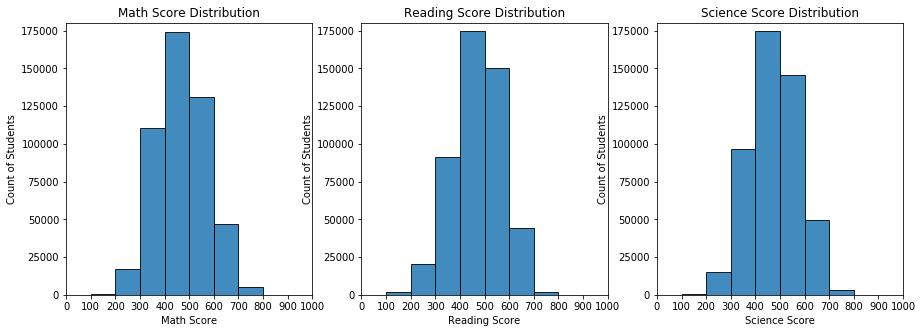

In [16]:
plt.figure(figsize=[15, 5])
hist_bins = np.arange(0, 1000 + 1, 100)

# math score
plt.subplot(1, 3, 1);
plt.hist(df['Math Score'], bins=hist_bins, ec = 'black', alpha = 0.85);

plt.xlim(0, 1000);
plt.xticks(hist_bins)
plt.ylim(0, 180000 + 1);
plt.xlabel('Math Score');
plt.ylabel('Count of Students');
plt.title("Math Score Distribution");

# reading score
plt.subplot(1, 3, 2);
plt.hist(df['Reading Score'], bins=hist_bins, ec = 'black', alpha = 0.85);

plt.xlim(0, 1000);
plt.xticks(hist_bins)
plt.ylim(0, 180000 + 1);
plt.xlabel('Reading Score');
plt.ylabel('Count of Students');
plt.title("Reading Score Distribution");

# science score
plt.subplot(1, 3, 3);
plt.hist(df['Science Score'], bins=hist_bins, ec = 'black', alpha = 0.85);

plt.xlim(0, 1000);
plt.xticks(hist_bins)
plt.ylim(0, 180000 + 1);
plt.xlabel('Science Score');
plt.ylabel('Count of Students');
plt.title("Science Score Distribution");

<li> For the above distribution, most of the student scores are in the range of 400-500 points </li>
<li> Majority of student score points are from 300-600 points </li>

<h3> Visualization - 2 </h3>

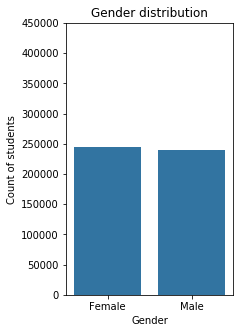

In [17]:
plt.figure(figsize=[3, 5]);
sns.countplot(x = 'Gender', data = df, color = sns.color_palette()[0]);

y_ticks = np.arange(0, 450000 + 1, 50000)
plt.yticks(y_ticks, y_ticks);
plt.ylabel("Count of students");
plt.title('Gender distribution');

<li> The Gender ratio in the Dataset is almost equally distributed </li>

<h3> Visualization - 3 </h3>

Next, we are interested in which countries have 'exceptionally performing' students, what there number is with respect to each country & subject.

From our histogram earlier the range of 200-800 is large enough to be noticed on the histogram, we can say that exceptionally performing students will be above 800

In [18]:
math_score = df[df['Math Score'] > 800]['Country'].value_counts()
reading_score = df[df['Reading Score'] > 800]['Country'].value_counts()
science_score = df[df['Science Score'] > 800]['Country'].value_counts()

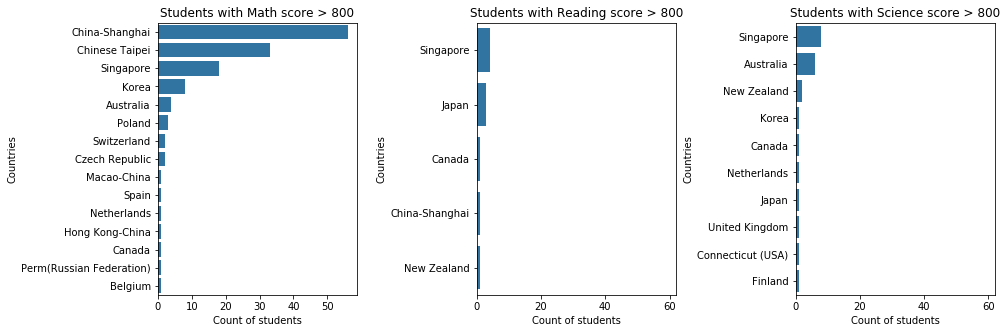

In [19]:
plt.figure(figsize = [15, 5])
plt.subplots_adjust(wspace = 0.6)
x_lim_max = math_score.values[0] + 6

plt.subplot(1, 3, 1)
sns.barplot(y = math_score.index, x = math_score.values, color = sns.color_palette()[0])
plt.title('Students with Math score > 800');
plt.xlabel('Count of students');
plt.ylabel('Countries');

plt.subplot(1, 3, 2)
sns.barplot(y = reading_score.index, x = reading_score.values, color = sns.color_palette()[0])
plt.xlim(0, x_lim_max);
plt.title('Students with Reading score > 800');
plt.xlabel('Count of students');
plt.ylabel('Countries');

plt.subplot(1, 3, 3)
sns.barplot(y = science_score.index, x = science_score.values, color = sns.color_palette()[0])
plt.xlim(0, x_lim_max);
plt.title('Students with Science score > 800');
plt.xlabel('Count of students');
plt.ylabel('Countries');

<li> China-Shanghai have the most students who have expectinally high math score </li>
<li> Singapore has the most students who have expectinally high reading & sciece score </li>

<h3> Visualization - 4 </h3>

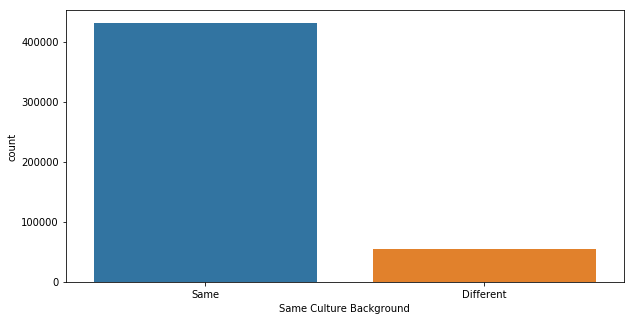

In [20]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Same Culture Background', data=df);
plt.show();

<li> Parent with Same Culture Background are significantly more than parent with different culture background </li>

<a id='bivariate'></a>
<h1> Bivariant Analysis & Visualization </h1>

<h3> Visualization - 5 </h3>

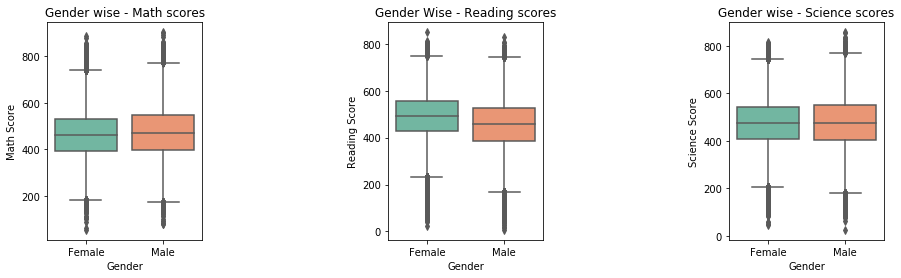

In [21]:
plt.figure(figsize = [15, 4])
plt.subplots_adjust(wspace = 1.2)

plt.subplot(1, 3, 1)
sns.boxplot(x = df['Gender'], y = df['Math Score'], palette = 'Set2')
plt.title('Gender wise - Math scores');

plt.subplot(1, 3, 2)
sns.boxplot(x = df['Gender'], y = df['Reading Score'], palette = 'Set2')
plt.title('Gender Wise - Reading scores');

plt.subplot(1, 3, 3)
sns.boxplot(x = df['Gender'], y = df['Science Score'], palette = 'Set2');
plt.title('Gender wise - Science scores');

<li> It can be seen that Male student perform slightly better than Female students in Math </li>
<li> It can be seen that Female student perform slightly better than Male students in Reading </li>
<li> It can be seen that Male student & female students performance is same in Science </li>

<h3> Visualization - 6 </h3>

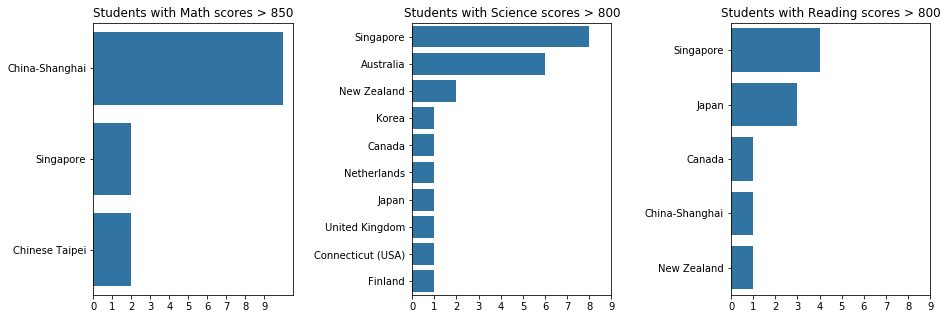

In [22]:
math_score = df[(df['Math Score'] >= 850)]['Country'].value_counts()
science_score = df[(df['Science Score'] >= 800)]['Country'].value_counts()
reading_score = df[(df['Reading Score'] >= 800)]['Country'].value_counts()

plt.figure(figsize = [15, 5])
plt.subplots_adjust(wspace = 0.6)
x_lim_max = science_score.values[0]

plt.subplot(1, 3, 1)
sns.barplot(y = math_score.index, x = math_score.values, color = sns.color_palette()[0])
plt.title('Students with Math scores > 850');
plt.xticks(np.arange(0, x_lim_max + 2, 1));

plt.subplot(1, 3, 2)
sns.barplot(y = science_score.index, x = science_score.values, color = sns.color_palette()[0])
plt.title('Students with Science scores > 800');
plt.xticks(np.arange(0, x_lim_max + 2, 1));

plt.subplot(1, 3, 3)
sns.barplot(y = reading_score.index, x = reading_score.values, color = sns.color_palette()[0])
plt.title('Students with Reading scores > 800');
plt.xticks(np.arange(0, x_lim_max + 2, 1));

<li> China-Shanghai have more students score more than 850 in Math </li>
<li> Singapore have more students score more than 800 in Science & Reading </li>

<h3> Visualization - 7 </h3>

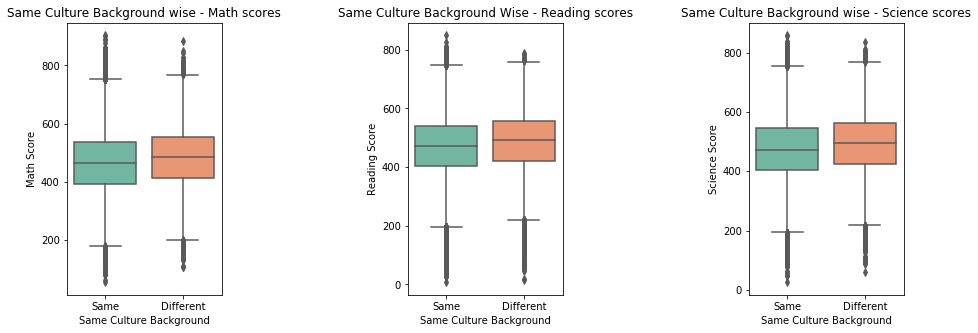

In [23]:
plt.figure(figsize = [15, 5])
plt.subplots_adjust(wspace = 1.2)

plt.subplot(1, 3, 1)
sns.boxplot(x = df['Same Culture Background'], y = df['Math Score'], palette = 'Set2')
plt.title('Same Culture Background wise - Math scores');

plt.subplot(1, 3, 2)
sns.boxplot(x = df['Same Culture Background'], y = df['Reading Score'], palette = 'Set2')
plt.title('Same Culture Background Wise - Reading scores');

plt.subplot(1, 3, 3)
sns.boxplot(x = df['Same Culture Background'], y = df['Science Score'], palette = 'Set2');
plt.title('Same Culture Background wise - Science scores');

It can be seen that, students coming from heterogenic family backgrounds report increased performance in all areas, compared to students from homogenous family backgrounds.

<h1> Multivariant Analysis & Visualization </h1>

<a id='multivariate'></a>
<h3> Visualization - 8 </h3>

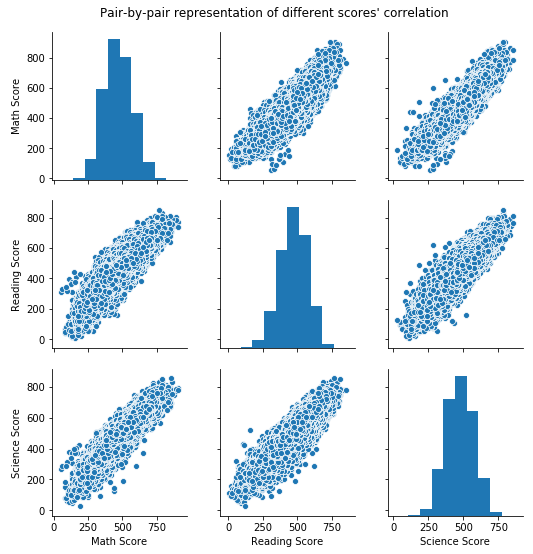

In [24]:
grid = sns.pairplot(data = df, vars=["Math Score", "Reading Score", "Science Score"]);
grid.fig.suptitle("Pair-by-pair representation of different scores' correlation", y = 1.02);

There is a very strong and positive correlation between any pair of the three variables representing the scores of the three subjects.

<a id='conclusions'></a>
## Conclusions and answers

* **_How do students from difeerent gender perform in Math, Reading and Science literacy?_** 
*_We have performed the analysis of particular question. The results can be explored in Visualisation 5 of Bivariant analysis_*
    
* **_Which countries have students with exceptionally high literacy scores?_**
*_Generally, we have seen Asian countries as being the world leaders at educating students who perform exceptionally. Singapore and China are examples of this._*
     
* **_We would like to find out whether students whose parents have different cultural backgrounds will report any changes in average scores, compared with students raised in a homogenous family background._**
*_We found that students whose parent come from different culture background tend perform better than students whose parents are from same culture background_*